## Regresion Lineal Simple con Sklearn!

Sklearn todo lo hace fácil. Sin embargo hay que conocer de ML para utilizar esta útil librería!

In [7]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [8]:
X, y = datasets.load_diabetes(return_X_y=True)

In [9]:
# variables X & y
bmi = X[:, np.newaxis, 2]
progreso = y

# separacion de test de entrenamiento y test de prueba.
bmi_train, bmi_test, progreso_train, progreso_test = train_test_split(bmi, progreso, test_size=0.30, random_state=42)

In [10]:
from sklearn.linear_model import LinearRegression

x = bmi_train
y = progreso_train.reshape(-1,1)

model = LinearRegression().fit(x, y)

b_1 = model.coef_[0]
b_0 = model.intercept_
rss = np.sum((y - b_0 - b_1 * x)**2)

print("b0:",b_0, "b1:", b_1, "rss:", rss)

b0: [151.04202449] b1: [988.41931249] rss: 1204931.5308257274


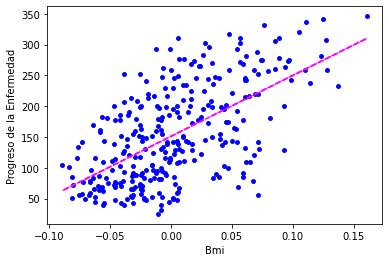

In [11]:
plt.scatter(bmi_train,progreso_train, marker = ".", s = 60, c = "blue")
plt.xlabel("Bmi")
plt.ylabel("Progreso de la Enfermedad")

# aqui estimamos la linea de regresion con unos parametros beta inventados.
y_prima = model.predict(bmi_train)

# desplegamos el modelo que minimiza RSS
plt.plot(bmi_train, y_prima, 'r--', c = "magenta")

plt.show()

In [6]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(progreso_train.reshape(-1,1), y_prima)
print("MSE:",mse)

MSE: 3899.45479231627


### Ejercicio en Clase: 

- a) Aplique el modelo generado sobre el set de pruebas.
- b) Obtenga el MSE del set de pruebas y comparelo con el MSE del set de entrenamiento
- c) Despliegue el set de pruebas y el modelo (la función de regresión) con Matplotlib 

In [12]:
# a) Aplique el modelo generado sobre el set de pruebas.

## <SU CODIGO AQUI>

In [13]:
# b) Obtenga el MSE del set de pruebas y comparelo con el MSE del set de entrenamiento

## <SU CODIGO AQUI>

In [14]:
# c) Despliegue el set de pruebas y el modelo (la función de regresión) con Matplotlib

## <SU CODIGO AQUI>